In [1]:
#clinical_trial_model.py
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

print("Loading dataset into SQLite database...")

#Load CSV


Loading dataset into SQLite database...


In [28]:
#Starting all over. Using an updated dataset with dummy variable this time - instead of labelencoder.
#Starting all over. Using an updated dataset with dummy variable this time - instead of labelencoder.
#Starting all over. Using an updated dataset with dummy variable this time - instead of labelencoder.
#Starting all over. Using an updated dataset with dummy variable this time - instead of labelencoder.

!pip install pandas scikit-learn joblib


In [29]:
from google.colab import files
uploaded = files.upload()  # Upload the CSV file you just provided

import pandas as pd

df = pd.read_csv("clinical_trial_dataset_1000.csv")
print("✅ Dataset loaded")
df.head()


Saving clinical_trial_dataset_1000.csv to clinical_trial_dataset_1000 (1).csv
✅ Dataset loaded


,Participant_ID,Age,Gender,Ethnicity,Health_Condition,Comorbidities,Previous_Adherence_Score,Trial_Phase,Dropout_Flag,Dropout_Reason
0,P0001,58,Male,White,NaN,Arthritis,0.85,Phase I,No,NaN
1,P0002,32,Male,White,NaN,NaN,0.72,Phase I,No,NaN
2,P0003,55,Female,White,Diabetes,Obesity,0.70,Phase I,Yes,Lack of Improvement
3,P0004,50,Male,White,Asthma,Depression,0.70,Phase III,No,NaN
4,P0005,59,Female,Black,Heart Disease,Depression,1.00,Phase II,Yes,Medical Advice


In [30]:
# Clean and inspect Dropout_Flag values
df["Dropout_Flag"] = df["Dropout_Flag"].str.strip().str.lower()

# Keep only rows with valid Yes/No labels
df = df[df["Dropout_Flag"].isin(["yes", "no"])]

# Convert Dropout_Flag to binary
df["Dropout_Flag"] = df["Dropout_Flag"].map({"yes": 1, "no": 0})

# Convert categorical features using dummy variables
categorical_cols = ["Gender", "Ethnicity", "Health_Condition", "Comorbidities", "Trial_Phase"]
df = pd.get_dummies(df, columns=categorical_cols)

# Drop unused columns
X = df.drop(columns=["Participant_ID", "Dropout_Reason", "Dropout_Flag"])
y = df["Dropout_Flag"]

print("✅ Data preprocessing done")


✅ Data preprocessing done


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model trained")


✅ Model trained


In [32]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))



📊 Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.95      0.82        73
           1       0.20      0.04      0.06        27

    accuracy                           0.70       100
   macro avg       0.46      0.49      0.44       100
weighted avg       0.58      0.70      0.62       100



In [33]:
import joblib
joblib.dump(model, "dropout_model.pkl")
print("✅ Model saved as 'dropout_model.pkl'")


✅ Model saved as 'dropout_model.pkl'


In [34]:
# Create a new participant (ensure it matches your dummy column names)
new_data = pd.DataFrame([{
    "Age": 55,
    "Side_Effects_Severity": 2,
    "Satisfaction_Score": 4,
    "Distance_to_Site_km": 10,
    "Visit_Frequency_per_Month": 3,
    "Gender_Female": 0,
    "Gender_Male": 1,
    "Ethnicity_Black": 0,
    "Ethnicity_White": 1,
    "Ethnicity_Asian": 0,
    "Health_Condition_Diabetes": 1,
    "Health_Condition_Hypertension": 0,
    "Comorbidities_None": 1,
    "Comorbidities_Heart Disease": 0,
    "Trial_Phase_Phase 1": 0,
    "Trial_Phase_Phase 2": 1,
    "Trial_Phase_Phase 3": 0
}])

# Align new_data with training columns
missing_cols = set(X.columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0
new_data = new_data[X.columns]

# Predict
prediction = model.predict(new_data)[0]
probability = model.predict_proba(new_data)[0][1]

print(f"\n🧪 Predicted Dropout: {'Yes' if prediction == 1 else 'No'}")
print(f"📈 Probability of Dropout: {round(probability * 100, 2)}%")



🧪 Predicted Dropout: No
📈 Probability of Dropout: 25.0%


In [35]:
#Creating a mini dasboard for summary metrics (accuracy, precision, recall, F1-score).
#Creating a Pie chart of actual dropout distribution
#Creating a Bar chart of feature importance

!pip install matplotlib seaborn


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 MODEL METRICS")
print(f"✅ Accuracy:  {accuracy:.2f}")
print(f"✅ Precision: {precision:.2f}")
print(f"✅ Recall:    {recall:.2f}")
print(f"✅ F1 Score:  {f1:.2f}")


📊 MODEL METRICS
✅ Accuracy:  0.70
✅ Precision: 0.20
✅ Recall:    0.04
✅ F1 Score:  0.06


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


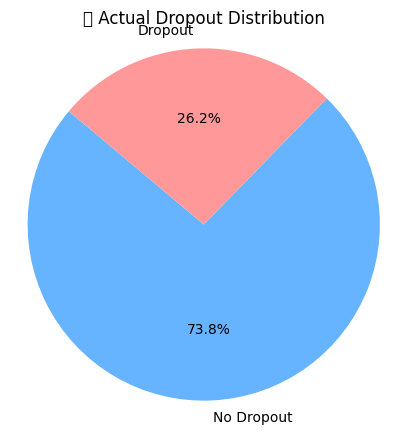

In [37]:
import matplotlib.pyplot as plt

labels = ["No Dropout", "Dropout"]
sizes = df["Dropout_Flag"].value_counts().sort_index()
colors = ["#66b3ff", "#ff9999"]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("💡 Actual Dropout Distribution")
plt.axis("equal")
plt.show()


<ipython-input-38-ce620e4872b5>:12: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


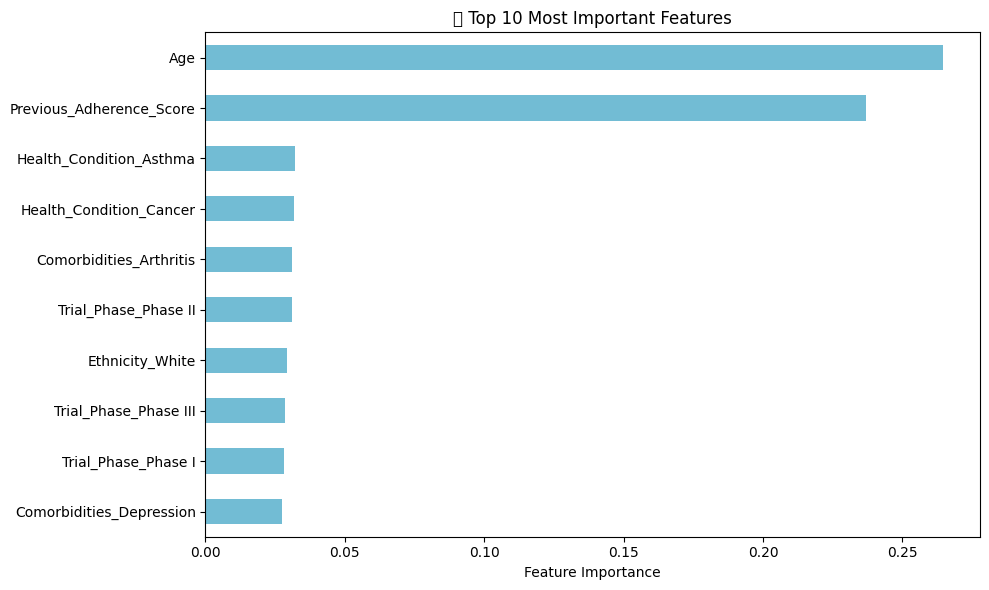

In [38]:
import pandas as pd

importances = model.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_importance.head(10).plot(kind="barh", color="#72bcd4")
plt.title("🔍 Top 10 Most Important Features")
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<ipython-input-40-d8203c134bbe>:11: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


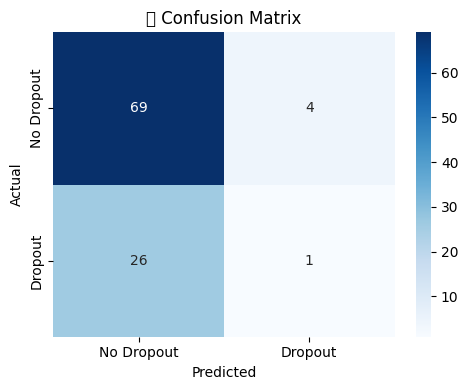

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📉 Confusion Matrix")
plt.tight_layout()
plt.show()

plt.savefig("chart_name.png", dpi=300)
files.download("chart_name.png")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, accuracy_score,
                             precision_score, recall_score, f1_score)
from imblearn.over_sampling import SMOTE

print("\n[1/7] Loading data...")
try:
    df = pd.read_csv("clinical_trial_dataset_1000.csv")
except FileNotFoundError:
    print("ERROR: File 'clinical_trial_dataset_1000.csv' not found.")
    exit(1)
print(f"Initial data shape: {df.shape}")

# Clean Dropout_Flag and drop NA
df = df.dropna(subset=["Dropout_Flag"])
df["Dropout_Flag"] = df["Dropout_Flag"].astype(str).str.strip().str.lower()
df = df[df["Dropout_Flag"].isin(["yes", "no"])]
df["Dropout_Flag"] = df["Dropout_Flag"].map({"yes": 1, "no": 0})

# Drop obvious leakage/id columns if present
drop_cols = [col for col in ["Participant_ID", "Dropout_Reason"] if col in df.columns]
df = df.drop(columns=drop_cols, errors='ignore')

# Categorical columns to one-hot encode
cat_cols = [col for col in ["Gender", "Ethnicity", "Health_Condition", "Comorbidities", "Trial_Phase"] if col in df.columns]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Demo feature engineering (add more as needed)
if "Satisfaction_Score" in df.columns and "Adherence_Score" in df.columns:
    df["Interaction_Score"] = df["Satisfaction_Score"] * df["Adherence_Score"]

X = df.drop(columns=["Dropout_Flag"])
y = df["Dropout_Flag"]

print("\n[2/7] Splitting data (80/20, stratified)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("\n[3/7] Applying SMOTE to handle class imbalance...")
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("\n[4/7] Model training: Random Forest and Logistic Regression (baseline)")
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:,1]

rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

def show_results(y_true, y_pred, y_proba, model_name):
    print(f"\n---- {model_name} ----")
    print(classification_report(y_true, y_pred, digits=3))
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.2f}")
    print(f"F1-score:  {f1_score(y_true, y_pred):.2f}")
    print(f"ROC AUC:   {roc_auc_score(y_true, y_proba):.2f}")
    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Dropout", "Dropout"], yticklabels=["No Dropout", "Dropout"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix ({model_name})")
    plt.tight_layout()
    plt.show()
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={roc_auc_score(y_true, y_proba):.2f})")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {model_name}")
    plt.legend()
    plt.show()

print("\n[5/7] Evaluation:")
show_results(y_test, y_pred_lr, y_proba_lr, "Logistic Regression")
show_results(y_test, y_pred_rf, y_proba_rf, "Random Forest")

# Feature importance (Random Forest)
importances = rf.feature_importances_
features = X.columns
fi = pd.Series(importances, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
fi.head(10).plot(kind="barh", color="#2494bf")
plt.title("Top 10 Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n[6/7] Saving model and columns for future use...")
joblib.dump(rf, "dropout_rf_model.pkl")
joblib.dump(list(X.columns), "dropout_rf_features.pkl")
print("Model and features saved as dropout_rf_model.pkl and dropout_rf_features.pkl.")

print("\nScript complete. Your model is ready to use!")


[1/7] Loading data...
ERROR: File 'clinical_trial_dataset_1000.csv' not found.


NameError: name 'df' is not defined

In [2]:
#trying again
#trying again

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, accuracy_score,
                             precision_score, recall_score, f1_score)
from imblearn.over_sampling import SMOTE

In [5]:
from google.colab import files
uploaded = files.upload()  # Upload the CSV file you just provided

import pandas as pd

df = pd.read_csv("clinical_trial_dataset_1000.csv")
print("✅ Dataset loaded")
df.head()

Saving clinical_trial_dataset_1000.csv to clinical_trial_dataset_1000.csv
✅ Dataset loaded


,Participant_ID,Age,Gender,Ethnicity,Health_Condition,Comorbidities,Previous_Adherence_Score,Trial_Phase,Dropout_Flag,Dropout_Reason
0,P0001,58,Male,White,NaN,Arthritis,0.85,Phase I,No,NaN
1,P0002,32,Male,White,NaN,NaN,0.72,Phase I,No,NaN
2,P0003,55,Female,White,Diabetes,Obesity,0.70,Phase I,Yes,Lack of Improvement
3,P0004,50,Male,White,Asthma,Depression,0.70,Phase III,No,NaN
4,P0005,59,Female,Black,Heart Disease,Depression,1.00,Phase II,Yes,Medical Advice


In [6]:
# Clean Dropout_Flag and drop NA
df = df.dropna(subset=["Dropout_Flag"])
df["Dropout_Flag"] = df["Dropout_Flag"].astype(str).str.strip().str.lower()
df = df[df["Dropout_Flag"].isin(["yes", "no"])]
df["Dropout_Flag"] = df["Dropout_Flag"].map({"yes": 1, "no": 0})

# Drop obvious leakage/id columns if present
drop_cols = [col for col in ["Participant_ID", "Dropout_Reason"] if col in df.columns]
df = df.drop(columns=drop_cols, errors='ignore')

# Categorical columns to one-hot encode
cat_cols = [col for col in ["Gender", "Ethnicity", "Health_Condition", "Comorbidities", "Trial_Phase"] if col in df.columns]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Demo feature engineering (add more as needed)
if "Satisfaction_Score" in df.columns and "Adherence_Score" in df.columns:
    df["Interaction_Score"] = df["Satisfaction_Score"] * df["Adherence_Score"]

X = df.drop(columns=["Dropout_Flag"])
y = df["Dropout_Flag"]

In [7]:
print("\n[2/7] Splitting data (80/20, stratified)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("\n[3/7] Applying SMOTE to handle class imbalance...")
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("\n[4/7] Model training: Random Forest and Logistic Regression (baseline)")
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:,1]


[2/7] Splitting data (80/20, stratified)...

[3/7] Applying SMOTE to handle class imbalance...

[4/7] Model training: Random Forest and Logistic Regression (baseline)



[5/7] Evaluation:

---- Logistic Regression ----
              precision    recall  f1-score   support

           0      0.726     0.520     0.606       148
           1      0.245     0.442     0.315        52

    accuracy                          0.500       200
   macro avg      0.486     0.481     0.461       200
weighted avg      0.601     0.500     0.531       200

Accuracy:  0.50
Precision: 0.24
Recall:    0.44
F1-score:  0.32
ROC AUC:   0.48


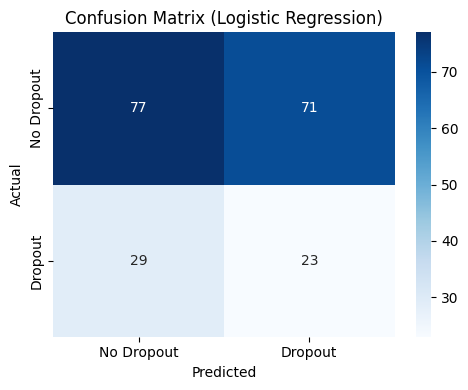

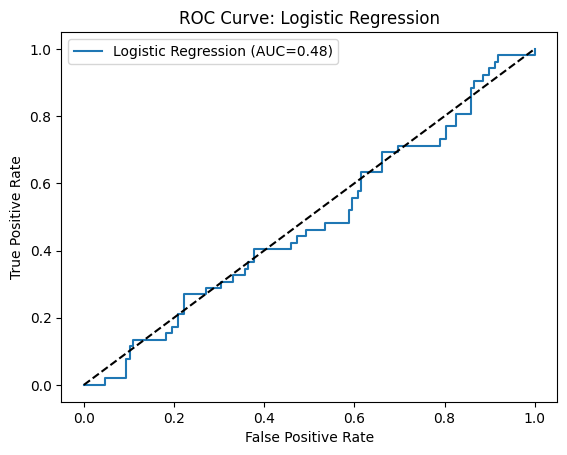


---- Random Forest ----
              precision    recall  f1-score   support

           0      0.739     0.764     0.751       148
           1      0.255     0.231     0.242        52

    accuracy                          0.625       200
   macro avg      0.497     0.497     0.497       200
weighted avg      0.613     0.625     0.619       200

Accuracy:  0.62
Precision: 0.26
Recall:    0.23
F1-score:  0.24
ROC AUC:   0.48


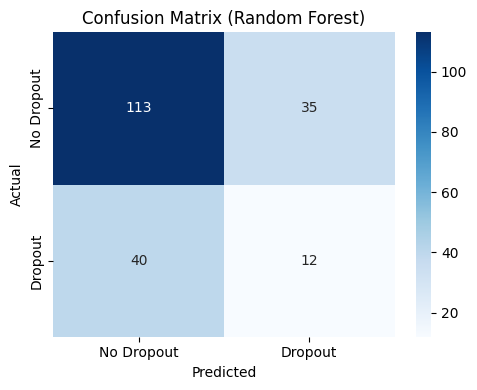

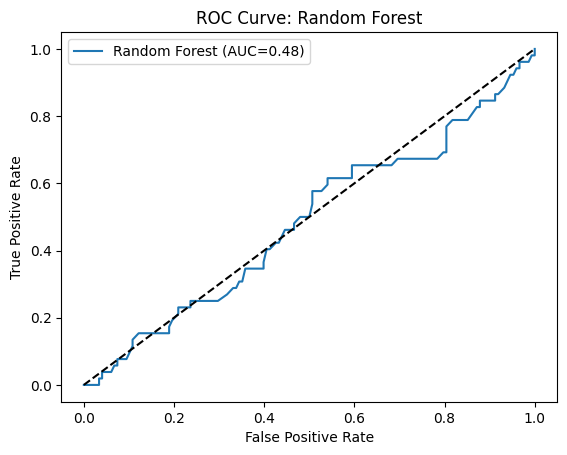

In [8]:
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

def show_results(y_true, y_pred, y_proba, model_name):
    print(f"\n---- {model_name} ----")
    print(classification_report(y_true, y_pred, digits=3))
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.2f}")
    print(f"F1-score:  {f1_score(y_true, y_pred):.2f}")
    print(f"ROC AUC:   {roc_auc_score(y_true, y_proba):.2f}")
    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Dropout", "Dropout"], yticklabels=["No Dropout", "Dropout"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix ({model_name})")
    plt.tight_layout()
    plt.show()
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={roc_auc_score(y_true, y_proba):.2f})")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {model_name}")
    plt.legend()
    plt.show()

print("\n[5/7] Evaluation:")
show_results(y_test, y_pred_lr, y_proba_lr, "Logistic Regression")
show_results(y_test, y_pred_rf, y_proba_rf, "Random Forest")

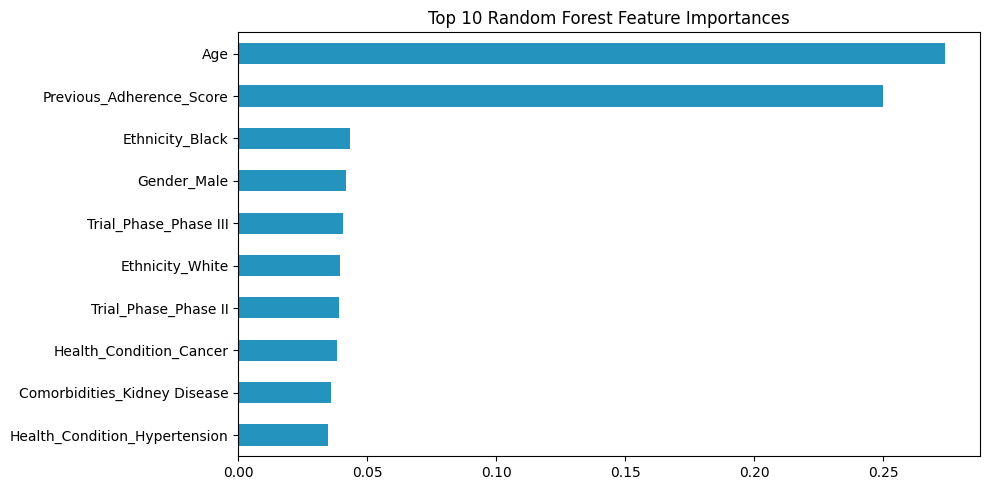


[6/7] Saving model and columns for future use...
Model and features saved as dropout_rf_model.pkl and dropout_rf_features.pkl.

Script complete. Your model is ready to use!


In [9]:
# Feature importance (Random Forest)
importances = rf.feature_importances_
features = X.columns
fi = pd.Series(importances, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
fi.head(10).plot(kind="barh", color="#2494bf")
plt.title("Top 10 Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n[6/7] Saving model and columns for future use...")
joblib.dump(rf, "dropout_rf_model.pkl")
joblib.dump(list(X.columns), "dropout_rf_features.pkl")
print("Model and features saved as dropout_rf_model.pkl and dropout_rf_features.pkl.")

print("\nScript complete. Your model is ready to use!")